### ASTR 3300/ PHYS 5300-003: Astrostatistics
***N. Pol***
___

# Homework 7
### Due: Friday, Apr. 4, at 11.59pm CT
---

This is a regression problem. Many of the parts require minor variations of code to switch to new techniques, but otherwise using a similar workflow. 

Note of warning: the data I have provided have associated uncertainties, `yerr`. `sklearn` and `astroML` have different formats for using uncertainties; in `sklearn` fitting you can provide `sample_weight=1/yerr**2`, while in `astroML` fitting you can directly provide `y_error=yerr`.

1. Read in `hw7_data_1.npy`. The dataset should consist of $500$ samples. The first two columns are the two data features, `X`. The third column is the target labels, `y`, and the final column are the heteroscedastic uncertainties on the labels, `yerr`. Make a 2-panel scatter plot of the labels versus each feature.


2. Use multivariate linear regression on this data with its uncertainties (`astroML` rather than plain `sklearn` is the better option here). Print the best-fit intercept and slopes for the features. Make a prediction `Xgrid` over $50$ values from the min to the max value of each feature, and plot the best-fit model on a duplicate of the $2$-panel plot from (1); does this look like a good description of the data?


3. Make a new two-dimensional prediction meshgrid `Xgrid` over the $2$-D feature space, use your best-fit model to predict the labels, and make a $3$-D interactive plot showing the data and your best-fit over the entire space. You may find the following code useful.

In [15]:
!pip install ipywidgets --upgrade

  Attempting uninstall: widgetsnbextension
    Found existing installation: widgetsnbextension 3.5.1
    Uninstalling widgetsnbextension-3.5.1:
      Successfully uninstalled widgetsnbextension-3.5.1
  Attempting uninstall: ipywidgets
    Found existing installation: ipywidgets 7.5.1
    Uninstalling ipywidgets-7.5.1:
      Successfully uninstalled ipywidgets-7.5.1


In [16]:
# install the relevant interactive plot packages
# only do this once
!pip install ipywidgets ipympl

## Part 1

In [300]:
#import things
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

import scipy.stats
from scipy import optimize
from scipy.stats import norm
from scipy.stats import uniform
from astroML import stats as astroMLstats
from scipy.stats import laplace
import corner
import numdifftools as nd
from scipy.stats import uniform
from scipy import stats
import numpy as np
import emcee

Text(0, 0.5, 'Label')

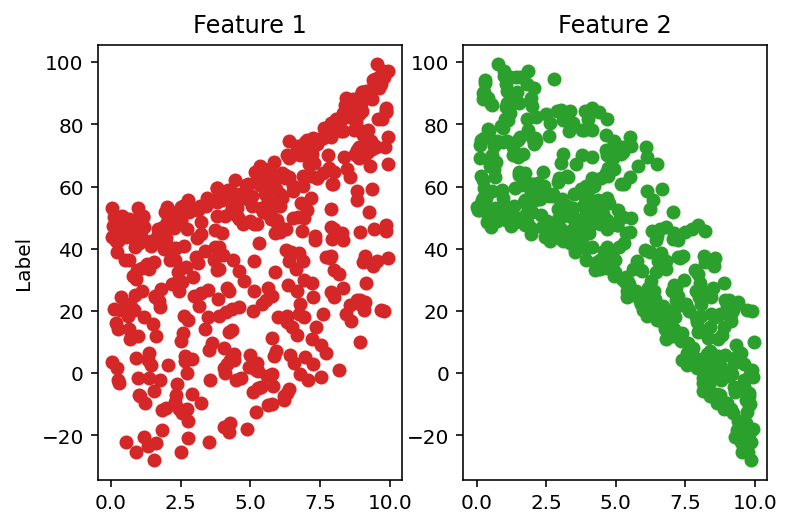

In [301]:
#1 same as HW3
#read in the data
data=np.load('../../../homeworks/hw_data/hw7_data_1.npy')
#slice array
x=data[:,0]
y=data[:,1]
label=data[:,2]
yerr=data[:,3]

#plotting 
fig, (ax1, ax2) = plt.subplots(1, 2) #set up plot
ax1.scatter(x,label,color="C3")#loc="lower right"
ax2.scatter(y,label,color="C2")#loc="lower right"
#C0 blue,C1 orange,C2 GREEN, C3 red, C4 weak purple 
plt.axis
ax1.set_title("Feature 1")
ax2.set_title("Feature 2")
ax1.set_ylabel("Label")

## Part 2

theta0= 57.10102323299546 theta1= [57.10102323  4.94873016 -8.30023407]


Text(0, 0.5, 'Label')

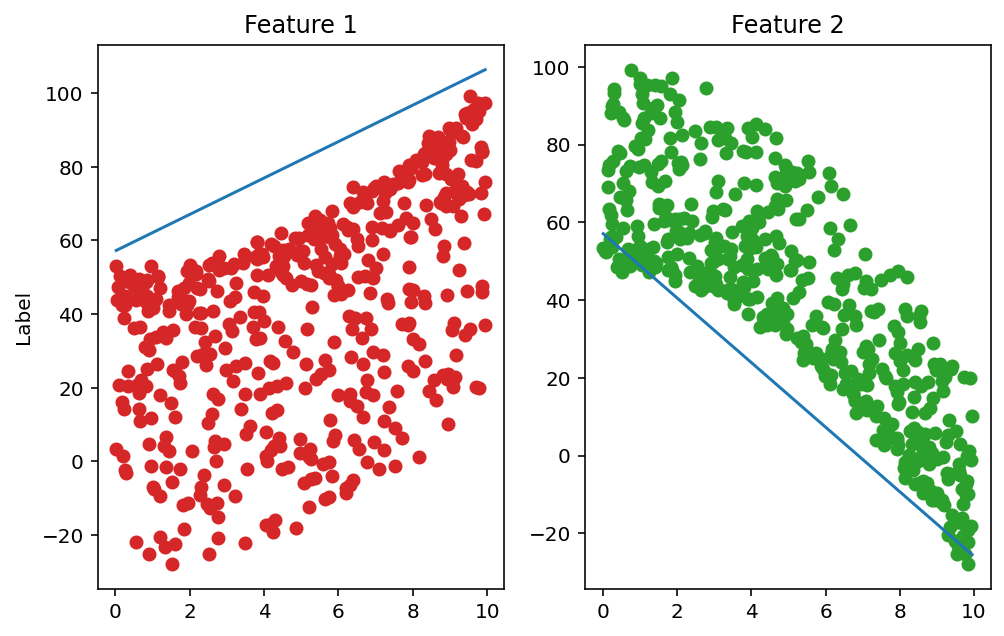

In [303]:
#linear regreasion
from astroML.linear_model import LinearRegression
#getting min max of each feature 
min1=np.min(x)
max1=np.max(x)
min2=np.min(y)
max2=np.max(y)
#setting up grid
xgrid1=np.linspace(min1,max1,50)
xgrid2=np.linspace(min2,max2,50)
xgrid=np.array(np.meshgrid(xgrid1,xgrid2)).T.reshape(-1,2)

xval=np.vstack([x,y]).T # data points in 
yval=label #lables
error = yerr # heteroscedastic errors

model = LinearRegression() #set up model
model.fit(xval,yval,error) #fit
print("theta0=",model.coef_[0],"theta1=",model.coef_) #get coeff

#predicition xgrid
#pred=model.predict(xgrid)
modelfit1=model.coef_[0]+model.coef_[1]*xgrid1
modelfit2=model.coef_[0]+model.coef_[2]*xgrid2

#plotting 
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(8, 5)) #set up plot
ax1.scatter(x,label,color="C3")#loc="lower right"
ax1.plot(xgrid1,modelfit1)
ax2.plot(xgrid2,modelfit2)
ax2.scatter(y,label,color="C2")#loc="lower right"
#C0 blue,C1 orange,C2 GREEN, C3 red, C4 weak purple 
plt.axis
ax1.set_title("Feature 1")
ax2.set_title("Feature 2")
ax1.set_ylabel("Label")


This does not do a good job of predicting the data. 

## Part 3

In [304]:
#3dim
#linear regreasion
#getting min max of each feature 
min1=np.min(x)
max1=np.max(x)
min2=np.min(y)
max2=np.max(y)

#setting up grid
xgrid1=np.linspace(min1,max1,50)
xgrid2=np.linspace(min2,max2,50)
xgrid=np.array(np.meshgrid(xgrid1,xgrid2)).T.reshape(-1,2) #shaping 
pred=model.predict(xgrid)

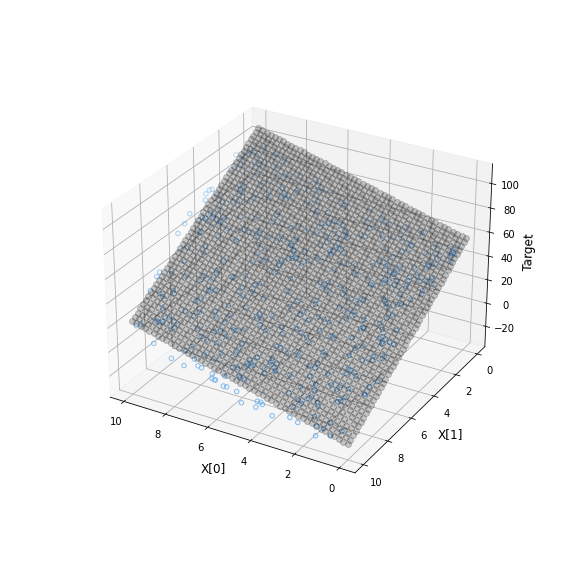

In [93]:
# Makes the plot interactive. 
# You can pan the image.

### always do this line at the start 
### of an interactive plotting cell
%matplotlib widget 
fig = plt.figure(figsize=(8, 8))

ax = fig.add_subplot(111, projection='3d')

ax.plot(xgrid[:,0],xgrid[:,1], pred, color='k', 
        zorder=15, linestyle='none', 
        marker='o', alpha=0.2)
ax.scatter(x.flatten(), y.flatten(), label, 
           facecolor=(0,0,0,0), s=20, 
           edgecolor='#70b3f0')
ax.set_xlabel('X[0]', fontsize=12)
ax.set_ylabel('X[1]', fontsize=12)
ax.set_zlabel('Target', fontsize=12)

ax.view_init(elev=28, azim=120)

In [132]:
### Always do this line at the start
### of a static plotting cell
%matplotlib inline

4. Sticking with a linear model, now attempt a `GridSearchCV` procedure on the data to find the best `Ridge` regression hyper-parameters. Use the following `param_grid`:
```
ridge_params = {'alpha': [0.05,0.1,0.2,0.5,1.0], 'solver': ['svd', 'lsqr']}
```
What are the `best_params_` and the `best_score_` from this? Fit the data with the best options, and visualize interactively. Try `RidgeCV` also; what cross-validated `alpha_` does it return, and does this agree with `GridSeachCV`? *(Hint: remember to revert to inline matplotlib when you're done each time you make an interactive plot.)*


5. Now model the data using Gaussian process regression and the default kernel. Check what the fit looks like with and with and without uncertainties accounted for. *(Hint: GPR in `sklearn` takes an `alpha` parameter equal to `(yerr/y)**2`.)*


6. Let's look finally at polynomial fitting. Fit a $4$th degree polynomial to the data. Print the best-fit regression coefficients, predict on the 2D meshgrid, and visualize interactively as before. How does this look compared to the linear model and GPR models?


7. Sticking with polynomial fitting, let's find the optimal hyper-parameters through cross-validation. 
- Using `sklearn.model_selection.train_test_split`, first do a train-test split with a `test_size` of $20\%$. Then split out $20\%$ of the training set itself as a cross-validation set (leaving a somewhat smaller set to use for training). Note that you'll need to simultaneously split out `yerr` as well by just providing this as another array to `train_test_split`.
- Compute the training and cross-validation rms errors (and from those, the BIC values) as a function of polynomial degree from $1$ to $10$ inclusive. Plot the rms errors and BIC values as a function of the polynomial degree. 
- Choose the optimal polynomial degree, and train on all training data from the first `train_test_split` operation. Predict the labels of the held-out test set, and finally compute the testing rms error.

## Part 4

In [98]:
#grid search cv
#code from lecture 18
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge_params = {'alpha': [0.05,0.1,0.2,0.5,1.0], 'solver': ['svd', 'lsqr']}
#xval=np.vstack([x,y]).T # 100 points in 2D
#yval=label
error = yerr # heteroscedastic errors

model = Ridge() # alpha here is lambda in the book
gridsearch=GridSearchCV(model,ridge_params,cv=5)
gridsearch.fit(xval,yval)
print('The best parameters are',gridsearch.best_params_,'The best score is',gridsearch.best_score_)

The best parameters are {'alpha': 1.0, 'solver': 'svd'} The best score is 0.9290800590702192


In [130]:
#I had to redefine variables
x=data[:,0]
y=data[:,1]
label=data[:,2]
yerr=data[:,3]

#getting min max of each feature 
min1=np.min(x)
max1=np.max(x)
min2=np.min(y)
max2=np.max(y)

#setting up grid
xgrid1=np.linspace(min1,max1,50)
xgrid2=np.linspace(min2,max2,50)
xgrid=np.array(np.meshgrid(xgrid1,xgrid2)).T.reshape(-1,2)

#getting a predicition from best estimator 
results=gridsearch.best_estimator_
plotfit=results.predict(xgrid)

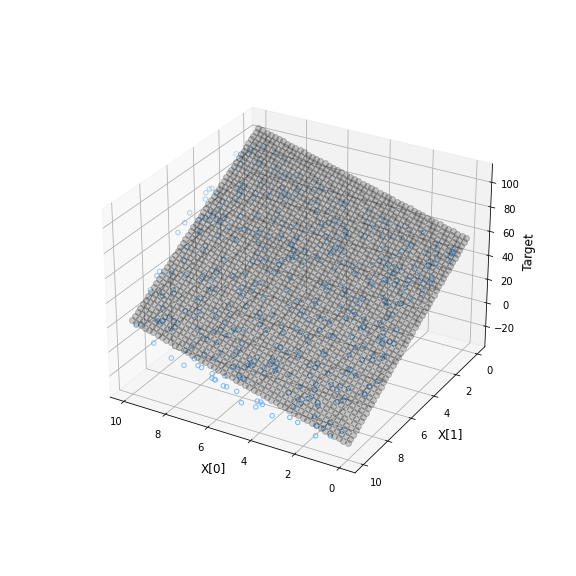

In [131]:
# Makes the plot interactive. 
# You can pan the image.

### always do this line at the start 
### of an interactive plotting cell
%matplotlib widget 
fig = plt.figure(figsize=(8, 8))

ax = fig.add_subplot(111, projection='3d')

ax.plot(xgrid[:,0],xgrid[:,1], plotfit, color='k', 
        zorder=15, linestyle='none', 
        marker='o', alpha=0.2)
ax.scatter(x.flatten(), y.flatten(), label, 
           facecolor=(0,0,0,0), s=20, 
           edgecolor='#70b3f0')
ax.set_xlabel('X[0]', fontsize=12)
ax.set_ylabel('X[1]', fontsize=12)
ax.set_zlabel('Target', fontsize=12)

ax.view_init(elev=28, azim=120)

In [132]:
### Always do this line at the start
### of a static plotting cell
%matplotlib inline

In [139]:
#now try ridge cv 
#code from sklearn documentation
from sklearn.linear_model import Ridge
from sklearn import linear_model
reg = linear_model.RidgeCV() #set up model
reg.fit(xval,yval) #fit
print('RidgeCV found alpha=',reg.alpha_)

RidgeCV found alpha= 1.0


Ridge agrees with the alpha we found with gridsearch.

## Part 5

In [150]:
#gaussian process regresssion
#code from lecture 18
from sklearn.gaussian_process import GaussianProcessRegressor
#no uncertanty
gp = GaussianProcessRegressor()
gp.fit(xval,yval)
y_pred, dy_pred = gp.predict(xval, return_std=True)
#print(y_pred, dy_pred)
plotfit=gp.predict(xgrid)

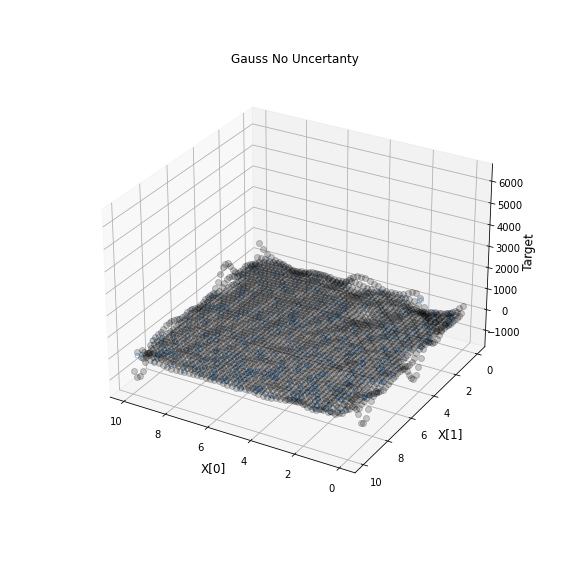

In [147]:
# Makes the plot interactive. 
# You can pan the image.

### always do this line at the start 
### of an interactive plotting cell
%matplotlib widget 
fig = plt.figure(figsize=(8, 8))

ax = fig.add_subplot(111, projection='3d')

ax.plot(xgrid[:,0],xgrid[:,1], plotfit, color='k', 
        zorder=15, linestyle='none', 
        marker='o', alpha=0.2)
ax.scatter(x.flatten(), y.flatten(), label, 
           facecolor=(0,0,0,0), s=20, 
           edgecolor='#70b3f0')
ax.set_xlabel('X[0]', fontsize=12)
ax.set_ylabel('X[1]', fontsize=12)
ax.set_zlabel('Target', fontsize=12)
ax.set_title('Gauss No Uncertanty')

ax.view_init(elev=28, azim=120)

In [148]:
### Always do this line at the start
### of a static plotting cell
%matplotlib inline

In [158]:
#gaussian process regresssion
#code from lecture 18
from sklearn.gaussian_process import GaussianProcessRegressor
#with uncertanty
dmu=yerr/label # error for sklearn formula
gp = GaussianProcessRegressor(alpha=dmu ** 2)
gp.fit(xval,yval)
y_pred, dy_pred = gp.predict(xval, return_std=True)
#print(y_pred, dy_pred)
plotfit=gp.predict(xgrid)

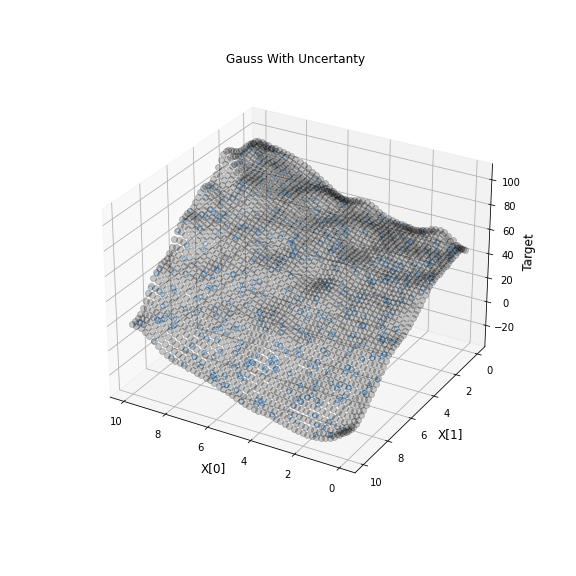

In [159]:
# Makes the plot interactive. 
# You can pan the image.

### always do this line at the start 
### of an interactive plotting cell
%matplotlib widget 
fig = plt.figure(figsize=(8, 8))

ax = fig.add_subplot(111, projection='3d')

ax.plot(xgrid[:,0],xgrid[:,1], plotfit, color='k', 
        zorder=15, linestyle='none', 
        marker='o', alpha=0.2)
ax.scatter(x.flatten(), y.flatten(), label, 
           facecolor=(0,0,0,0), s=20, 
           edgecolor='#70b3f0')
ax.set_xlabel('X[0]', fontsize=12)
ax.set_ylabel('X[1]', fontsize=12)
ax.set_zlabel('Target', fontsize=12)
ax.set_title('Gauss With Uncertanty')

ax.view_init(elev=28, azim=120)

This looks like it is overfitting the data!

In [160]:
### Always do this line at the start
### of a static plotting cell
%matplotlib inline

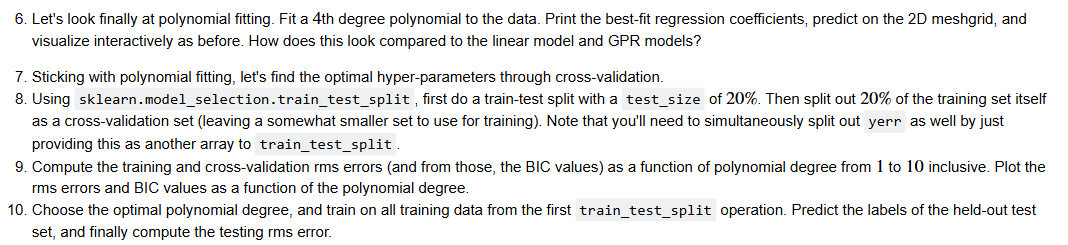

## Part 6

In [162]:
#polynomial fitting 
#4th degree
# Typical call from lecture 17
from astroML.linear_model import PolynomialRegression

degree = 4 #want a degree of 4
model = PolynomialRegression(degree) # fit 4rd degree polynomial
model.fit(xval, yval)
print(model.coef_) #get our coeff
plotfit=model.predict(xgrid)

[ 5.00363666e+01  3.26437755e-01  7.04566290e-02  3.76478281e-01
 -2.37398556e-02 -8.70986046e-01  1.19122182e-02  2.54637597e-02
 -1.32002013e-02  2.02705370e-02 -4.53796076e-04 -5.21142180e-04
 -2.06194460e-03  1.68744189e-03 -1.52054198e-03]


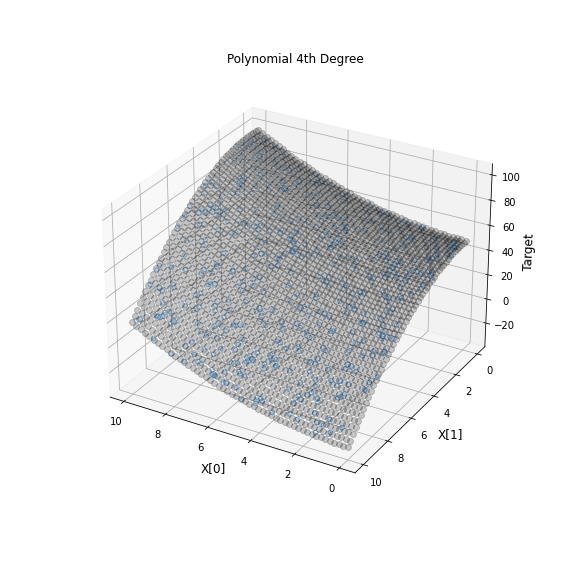

In [165]:
# Makes the plot interactive. 
# You can pan the image.

### always do this line at the start 
### of an interactive plotting cell
%matplotlib widget 
fig = plt.figure(figsize=(8, 8))

ax = fig.add_subplot(111, projection='3d')

ax.plot(xgrid[:,0],xgrid[:,1], plotfit, color='k', 
        zorder=15, linestyle='none', 
        marker='o', alpha=0.2)
ax.scatter(x.flatten(), y.flatten(), label, 
           facecolor=(0,0,0,0), s=20, 
           edgecolor='#70b3f0')
ax.set_xlabel('X[0]', fontsize=12)
ax.set_ylabel('X[1]', fontsize=12)
ax.set_zlabel('Target', fontsize=12)
ax.set_title('Polynomial 4th Degree')

ax.view_init(elev=28, azim=120)

In [166]:
### Always do this line at the start
### of a static plotting cell
%matplotlib inline

This fit looks much better than the gassian model. With the gaussain we were overfitting the data.

## Part 7

Following lecture code

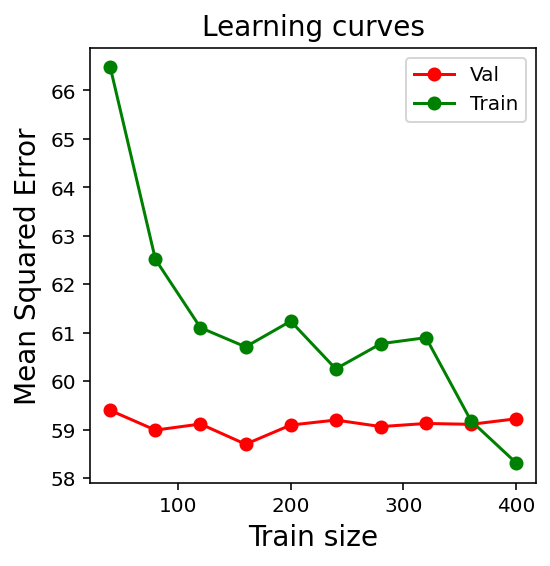

In [178]:
#cross validaiton time

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import learning_curve
from sklearn.model_selection import cross_val_predict
from astroML.linear_model import PolynomialRegression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import learning_curve

#adapted from lecture
scaler = StandardScaler()
Xscaled = scaler.fit_transform(xval)

lin_reg = PolynomialRegression() #now want polynomial reg
# Ten training sample sizes from 10% to 100%
train_sizes, train_scores_linreg, test_scores_linreg = \
    learning_curve(lin_reg, Xscaled, yval, train_sizes=np.linspace(0.1, 1, 10), \
    scoring="neg_mean_squared_error", cv=5)

fig = plt.figure(figsize=(4, 4))

plt.plot(train_sizes, -test_scores_linreg.mean(1), 'o-', color="r", label="Val")
plt.plot(train_sizes, -train_scores_linreg.mean(1), 'o-', color="g", label="Train")
                   
plt.xlabel("Train size",fontsize=14)
plt.ylabel("Mean Squared Error",fontsize=14)
plt.title('Learning curves',fontsize=14)
plt.legend(loc="best")
#plt.ylim(0,200)

#plt.show()


## Part 8

In [238]:
from sklearn.model_selection import train_test_split
#split 20%
xtrain,xtest,ytrain,ytest,errortrain,errortest=train_test_split(xval,yval,yerr,test_size=.2)
#split 20% out of training set 20%
xtrain1,xcross,ytrain1,ycross,errortrain1,errorcv=train_test_split(xtrain,ytrain,errortrain,test_size=.2)

## Part 9

In [262]:
#adapted from lecture 17
from astroML.linear_model import PolynomialRegression
degrees = np.arange(1,11) #range degree from 1 to 10
#create some empty lists
training_err = []
crossval_err = []
bictrain=[]
biccross=[]

for degree in degrees:
    model = PolynomialRegression(degree) # fit ith degree polynomial
    model.fit(xtrain1, ytrain1) #train
    
    subtrain=model.predict(xtrain1) #get prediction
    cv=model.predict(xcross) #cehck cross validaiton 
    
    
    training_err1 = np.sqrt(np.sum((ytrain1-subtrain) ** 2) #error on trainging
                              / len(ytrain1))
    crossval_err1 = np.sqrt(np.sum((ycross-cv) ** 2) #cv error
                              / len(cv))
    BIC_train = np.sqrt(len(ytrain1)) * training_err1 / np.mean(errortrain1) + degree * np.log(len(ytrain1))
    bictrain.append(BIC_train) #bic for the training 
    
    BIC_crossval = np.sqrt(len(ycross)) * crossval_err1 / np.mean(errorcv) + degree * np.log(len(ycross)) #bic for the cv
    
    training_err.append(training_err1)
    crossval_err.append(crossval_err1)
    biccross.append(BIC_crossval)
    
#print(bictrain)

[77.0383742035817, 29.765722047322907, 35.31217671131935, 41.01617343249566, 46.711891222802166, 52.268070274077864, 57.782266392510046, 63.366582573998606, 68.90888421917752, 74.44960437983897]


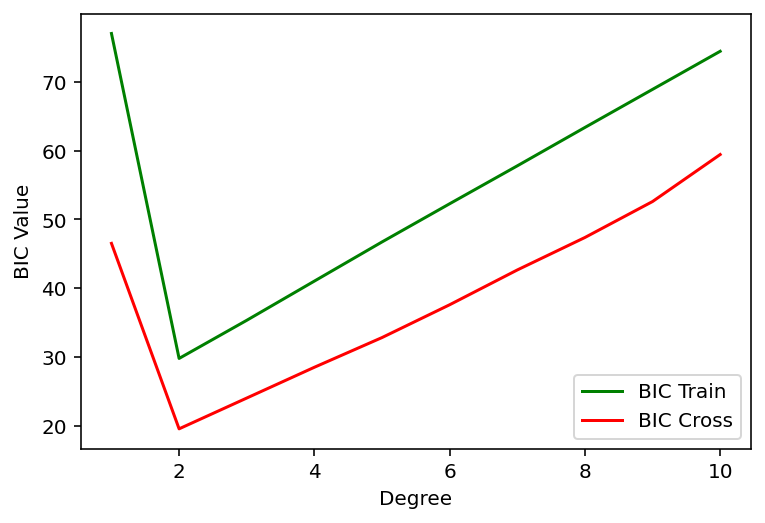

In [283]:
#plotting 
plt.plot(degrees,bictrain,label='BIC Train',color='g')
plt.plot(degrees,biccross,label='BIC Cross',color='r')

plt.xlabel('Degree')
plt.ylabel('BIC Value')
plt.legend()

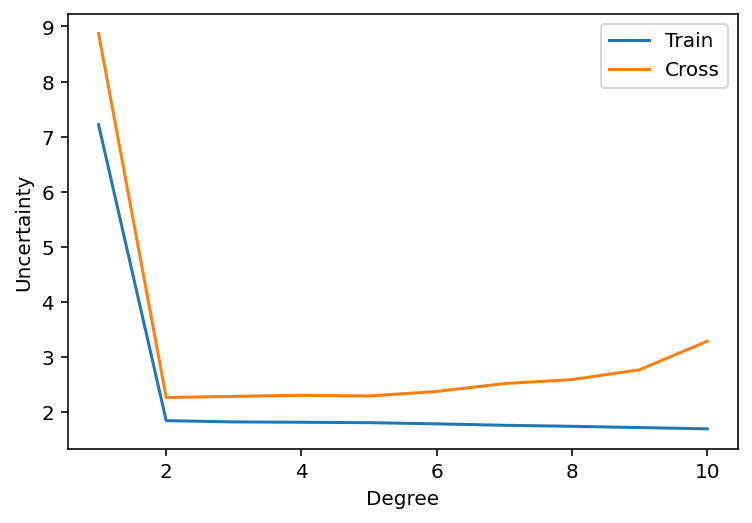

In [284]:
#plotting 
plt.plot(degrees,training_err,label='Train')
plt.plot(degrees,crossval_err,label='Cross')
plt.xlabel('Degree')
plt.ylabel('Uncertainty')
plt.legend()

## Part 10

From the plot we can see the best BIC is 2

In [281]:
#or can find with 
x=np.argsort(bictrain) #the element 1 corresponds to degree 2
print(x)


[1 2 3 4 5 6 7 8 9 0]


In [274]:
model = PolynomialRegression(2) # fit best degree polynomial
model.fit(xtrain, ytrain) #set to fit with training set
pred=model.predict(xtest) #get prediction 
err = np.sqrt(np.sum((ytest-pred) ** 2)
                              / len(ytest)) #cal rms error
print('Testing RMS Error=',err)

Testing RMS Error= 1.7780349144837064


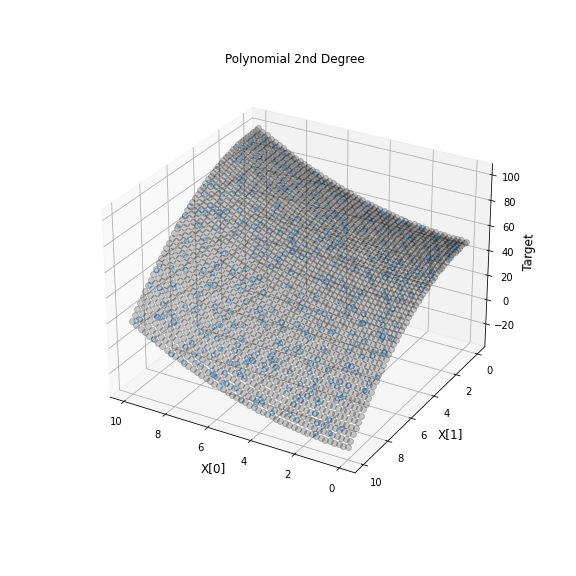

In [272]:
# Makes the plot interactive. 
# You can pan the image.
plotfit=model.predict(xgrid)
### always do this line at the start 
### of an interactive plotting cell
%matplotlib widget 
fig = plt.figure(figsize=(8, 8))

ax = fig.add_subplot(111, projection='3d')

ax.plot(xgrid[:,0],xgrid[:,1], plotfit, color='k', 
        zorder=15, linestyle='none', 
        marker='o', alpha=0.2)
ax.scatter(x.flatten(), y.flatten(), label, 
           facecolor=(0,0,0,0), s=20, 
           edgecolor='#70b3f0')
ax.set_xlabel('X[0]', fontsize=12)
ax.set_ylabel('X[1]', fontsize=12)
ax.set_zlabel('Target', fontsize=12)
ax.set_title('Polynomial 2nd Degree')

ax.view_init(elev=28, azim=120)

In [273]:
### Always do this line at the start
### of a static plotting cell
%matplotlib inline

<span style="color:green"> NP: Correct! Good job! </span>